In [99]:
import pandas as pd
import numpy as np
import seaborn as sb
% matplotlib inline

global_df = pd.read_csv('global_data.csv')
city_df = pd.read_csv('city_data.csv')

# Outline

1. Tools : Google Sheet ,Jupyter Notebook , Python

# SQL Query

### Query the Global Data
2. to get the global data
3. Select *
4. From global_data

### Query the City Data
6. To get the city which is Kuala Lumpur in the country Malaysia weather dataset
7. Select *
8. From city_data
9. Where Country = 'Malaysia'

### To find the city near me with my country
11. Select city
12. From city_list
13. Where Country = 'Malaysia'


# Process

1. Fix the datatpes
2. Take the average of 10 years between 1825 and 2013 for local data and 1804 and 2015 for global data.

# Key Considerations

1. Using moving average to keep the line as smooth as possible.
2. Making sure that  the two line chart has different colours so that the chart can be visualize clearly.
3. Making sure the y- axis and x - axis shown the labelled that is appropriate for the data.


In [100]:
global_df.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [101]:
city_df.head()

,year,avg_temp
0,1839,25.74
1,1840,25.96
2,1841,26.10
3,1842,26.18
4,1843,26.25


In [102]:
# Check the datatypes of global_df
global_df.dtypes

year          int64
avg_temp    float64
dtype: object

In [103]:
# Drop city dataframe missing values
city_df.dropna()

,year,avg_temp
0,1839,25.74
1,1840,25.96
2,1841,26.10
3,1842,26.18
4,1843,26.25
5,1844,25.77
6,1845,25.64
7,1846,26.44
8,1847,25.89
9,1850,26.06


In [104]:
# convert city dataframe to integer
city_df.astype(int)

,year,avg_temp
0,1839,25
1,1840,25
2,1841,26
3,1842,26
4,1843,26
5,1844,25
6,1845,25
7,1846,26
8,1847,25
9,1850,26


In [105]:
# Convert global data frame dataset to integer
global_df.astype(int)

,year,avg_temp
0,1750,8
1,1751,7
2,1752,5
3,1753,8
4,1754,8
5,1755,8
6,1756,8
7,1757,9
8,1758,6
9,1759,7


In [108]:
# Calculate the moving average of global average temperature across 10 years
global_df['moving_average'] = global_df['avg_temp'].rolling(window = 10).mean()

In [109]:
# Calculate the moving average of city average temperature acorss 10 years
city_df['moving_average'] = city_df['avg_temp'].rolling(window = 10).mean()

In [110]:
# Drop missing values
global_df.dropna()

,year,avg_temp,moving_average
9,1759,7.99,8.030
10,1760,7.19,7.877
11,1761,8.77,7.956
12,1762,8.61,8.239
13,1763,7.50,8.150
14,1764,8.40,8.143
15,1765,8.25,8.132
16,1766,8.41,8.088
17,1767,8.22,8.008
18,1768,6.78,8.012


In [111]:
# Drop the missing values
city_df.dropna()

,year,avg_temp,moving_average
9,1850,26.06,26.003
10,1851,26.13,26.042
11,1852,26.02,26.048
12,1853,26.26,26.064
13,1854,25.98,26.044
14,1855,26.12,26.031
15,1856,26.21,26.075
16,1858,26.21,26.132
17,1859,26.27,26.115
18,1860,25.97,26.123


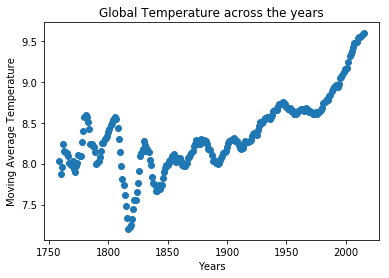

In [125]:
# Plotting the Global Temperature across the years
x = global_df['year']
y = global_df['moving_average']

plt.scatter(x , y)
plt.xlabel('Years')
plt.ylabel('Moving Average Temperature')
plt.title('Global Temperature across the years');

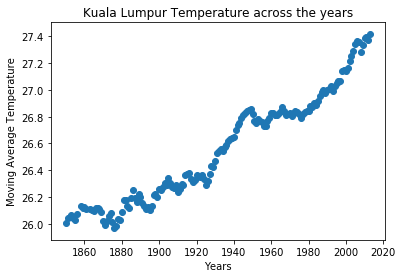

In [123]:
#Plotting Kuala Lumpur Temperature across the year
x = city_df['year']
y = city_df['moving_average']

plt.scatter(x , y)
plt.xlabel('Years')
plt.ylabel('Moving Average Temperature')
plt.title('Kuala Lumpur Temperature across the years');

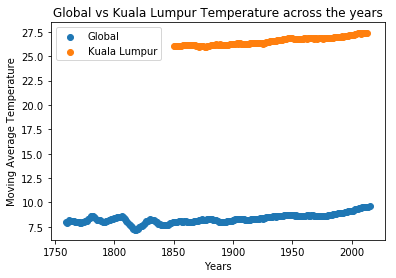

In [124]:
# Plotting Global Temperature vs Kuala Lumpur Temperature
x = global_df['year']
y = global_df['moving_average']

plt.scatter(x , y , label = 'Global')

x = city_df['year']
y = city_df['moving_average']

plt.scatter(x , y , label = 'Kuala Lumpur')
plt.xlabel('Years')
plt.ylabel('Moving Average Temperature')
plt.legend()
plt.title('Global vs Kuala Lumpur Temperature across the years');

Similarities and Differences :
1.  Both temperature for Local and Global has been relatively stable throughout the years.
2.  By analysing the local trend, we can observe that the local temperature has dropped significantly in 1870 to 25.59 Celsius and gradually increases to 27.8 Celsius in 2013.
3. While for global temperature, the global temperature has dropped to its lowest in 1840 which is 7.74 Celsius and rose steadily to 9.63 in 2015 which is the highest temperature for the average global temperature.
4. Both experience rapid rise in temperature in the year 1870 to 2015. Both data shows that global and local temperature recorded their hottest years in the latest data collected which is 2013 for local and 2015 for global. 
5. For Kuala Lumpur, the weather is relatively hotter throughout the years compare to the global temperature.
